클러스터링
==
데이터
--
- 전력판매량(시도별/용도별) 액셀 파일 https://goo.gl/Cx8Rzw
- 위 자료는 전력거래소에서 받은 자료임
- 이 파일을 현재 작업중인 (쥬피터 노트북이 실행되는) 폴더 아래에 data 폴더를 만들고 data 폴더로 복사한다

필요한 라이브러리(모듈) 설치
--

In [1]:
import os
os.getcwd()

'e:\\June'

In [2]:
os.chdir('C:/data')

In [3]:
os.getcwd()

'C:\\data'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

데이터 읽기
--

In [5]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [6]:
power_data = pd.read_excel('./시도별_용도별.xls')
print(power_data.shape)

(19, 28)


In [7]:
power_data.head().T

,0,1,2,3,4
구분,강원,개성,경기,경남,경북
주거용,1940933,0,16587710,4260988,3302463
공공용,1400421,0,5533662,1427560,1578115
서비스업,6203749,0,33434551,8667737,8487402
업무용합계,7604170,0,38968213,10095297,10065517
농림어업,607139,0,2371347,2141813,1747462
광업,398287,0,317263,95989,224568
제조업,6002286,0,56603327,18053778,30115601
식료품제조,546621,0,2544420,932743,566071
"섬유,의류",13027,0,2109963,346974,3780171


In [8]:
power = power_data.set_index('구분')
power = power.drop(['합계', '개성'], errors='ignore')

한글 폰트 설정 (맥, 윈도우, 리눅스)
--

In [9]:
import platform
import matplotlib
from matplotlib import font_manager, rc

# '-' 기호 보이게 하기
matplotlib.rcParams['axes.unicode_minus'] = False

# 운영 체제마다 한글이 보이게 하는 설정
# 윈도우
if platform.system() == 'Windows':
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
# 맥
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')

<Axes: ylabel='구분'>

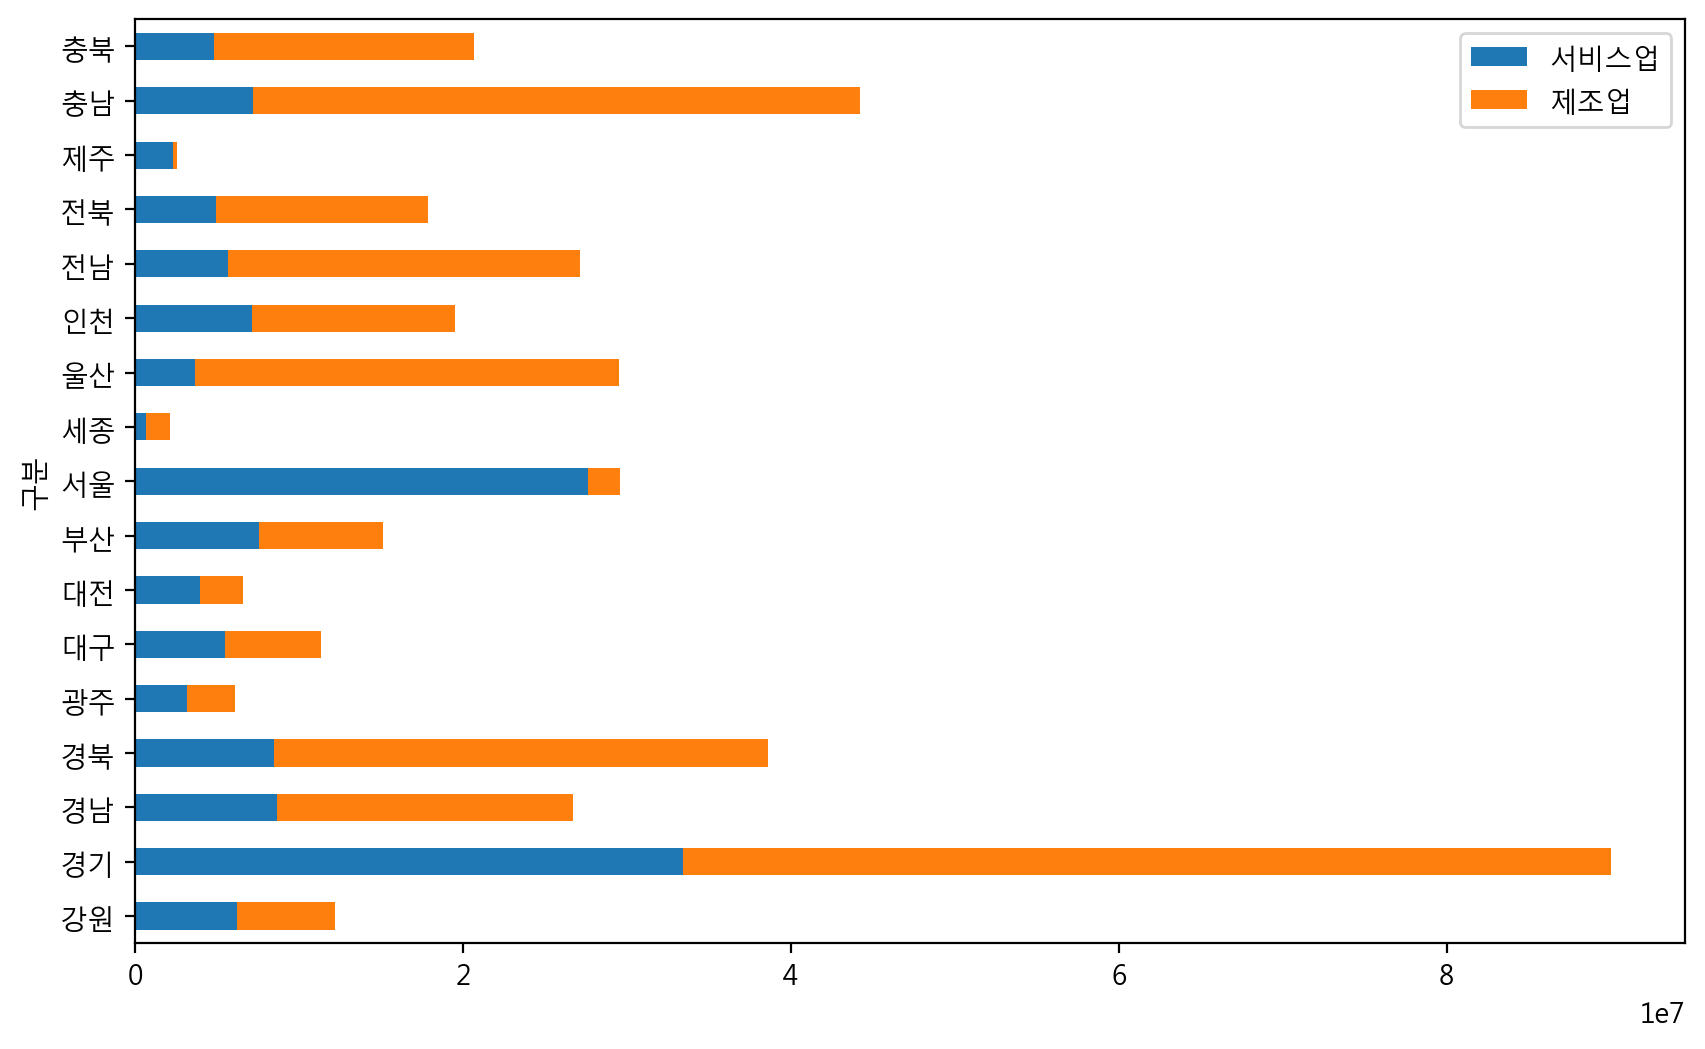

In [10]:
see2 = [ '서비스업','제조업']
power[see2].plot(kind='barh', figsize=(10,6), stacked=True)

In [11]:
power = power[['서비스업', '제조업']]
power.head(5)

,서비스업,제조업
구분,,
강원,6203749,6002286
경기,33434551,56603327
경남,8667737,18053778
경북,8487402,30115601
광주,3174973,2910768


In [12]:
power = power.drop(['경기', '서울'])
n_samples = power.shape[0] ; n_samples

15

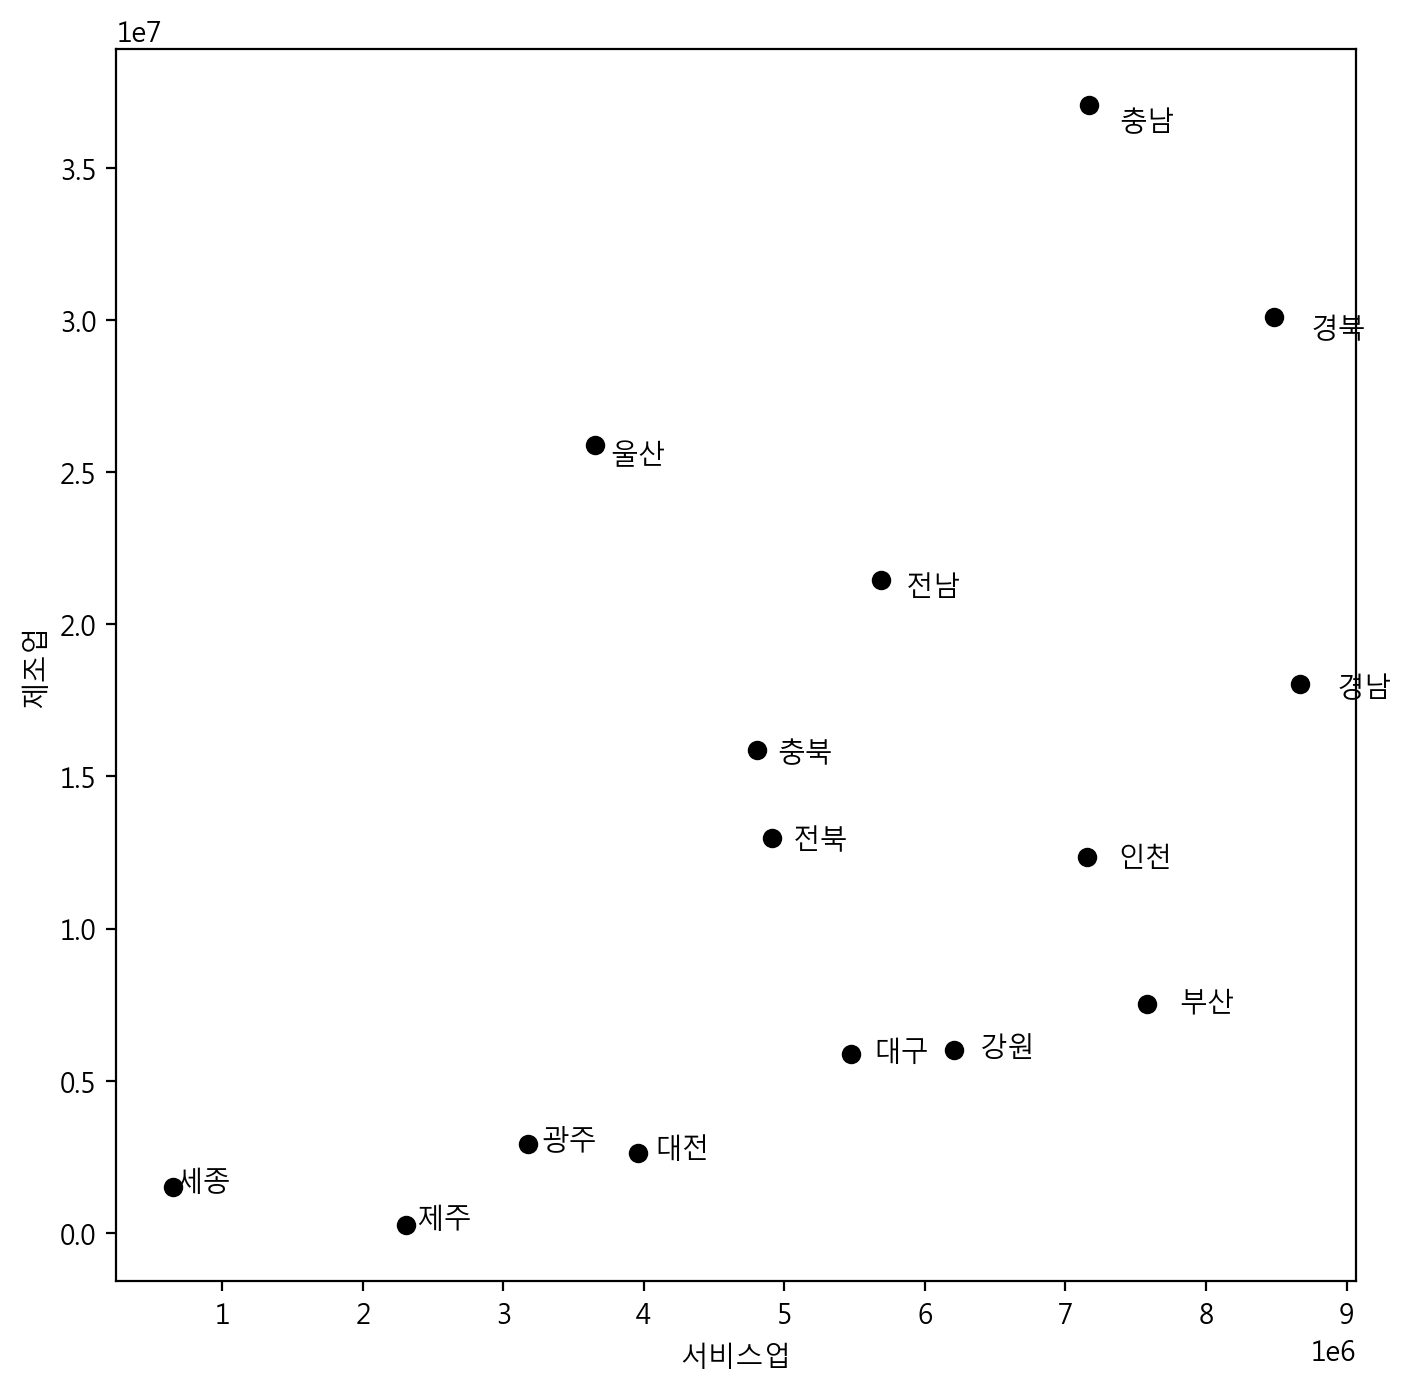

In [13]:
plt.figure(figsize=(8,8))
plt.scatter(power['서비스업'], power['제조업'],c='k',marker='o')
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(power.shape[0]):
    plt.text(power['서비스업'][n]*1.03, power['제조업'][n]*0.98, power.index[n])

스캐터 플롯
--

덴드로그램
--


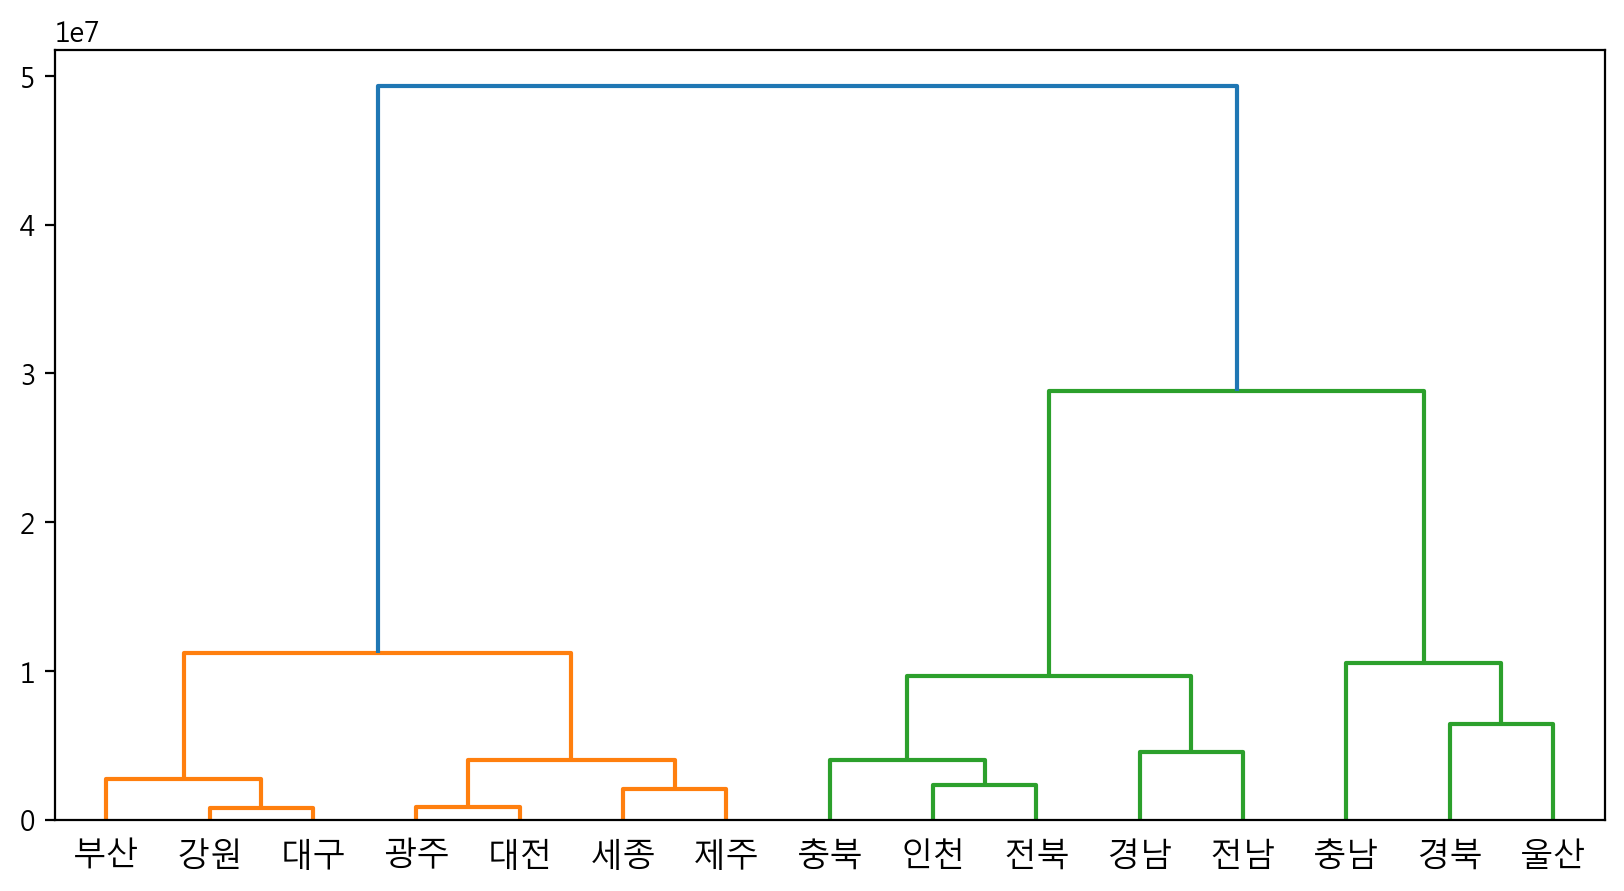

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(10, 5))
link_dist = linkage(power, metric='euclidean', method='ward')  
dendrogram(link_dist, labels=power.index)
plt.show()

클러스터링 (KMeans)
--

In [15]:
from sklearn.cluster import KMeans
k = KMeans(n_clusters=3).fit(power)
print(k.n_clusters)

c:\Users\ysbri\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


3


In [16]:
power['클러스터'] = k.labels_
power.head(10)

,서비스업,제조업,클러스터
구분,,,
강원,6203749,6002286,1
경남,8667737,18053778,2
경북,8487402,30115601,0
광주,3174973,2910768,1
대구,5470438,5862633,1
대전,3955921,2608343,1
부산,7582169,7512588,1
세종,645424,1502922,1
울산,3649386,25883132,0


In [17]:
power.drop('클러스터', axis = 1, inplace=True) ; power.head()

,서비스업,제조업
구분,,
강원,6203749,6002286
경남,8667737,18053778
경북,8487402,30115601
광주,3174973,2910768
대구,5470438,5862633


In [18]:
centers = k.cluster_centers_ ; centers

array([[ 6433742.33333333, 31018896.        ],
       [ 4191629.42857143,  3805868.14285714],
       [ 6245553.6       , 16144968.6       ]])

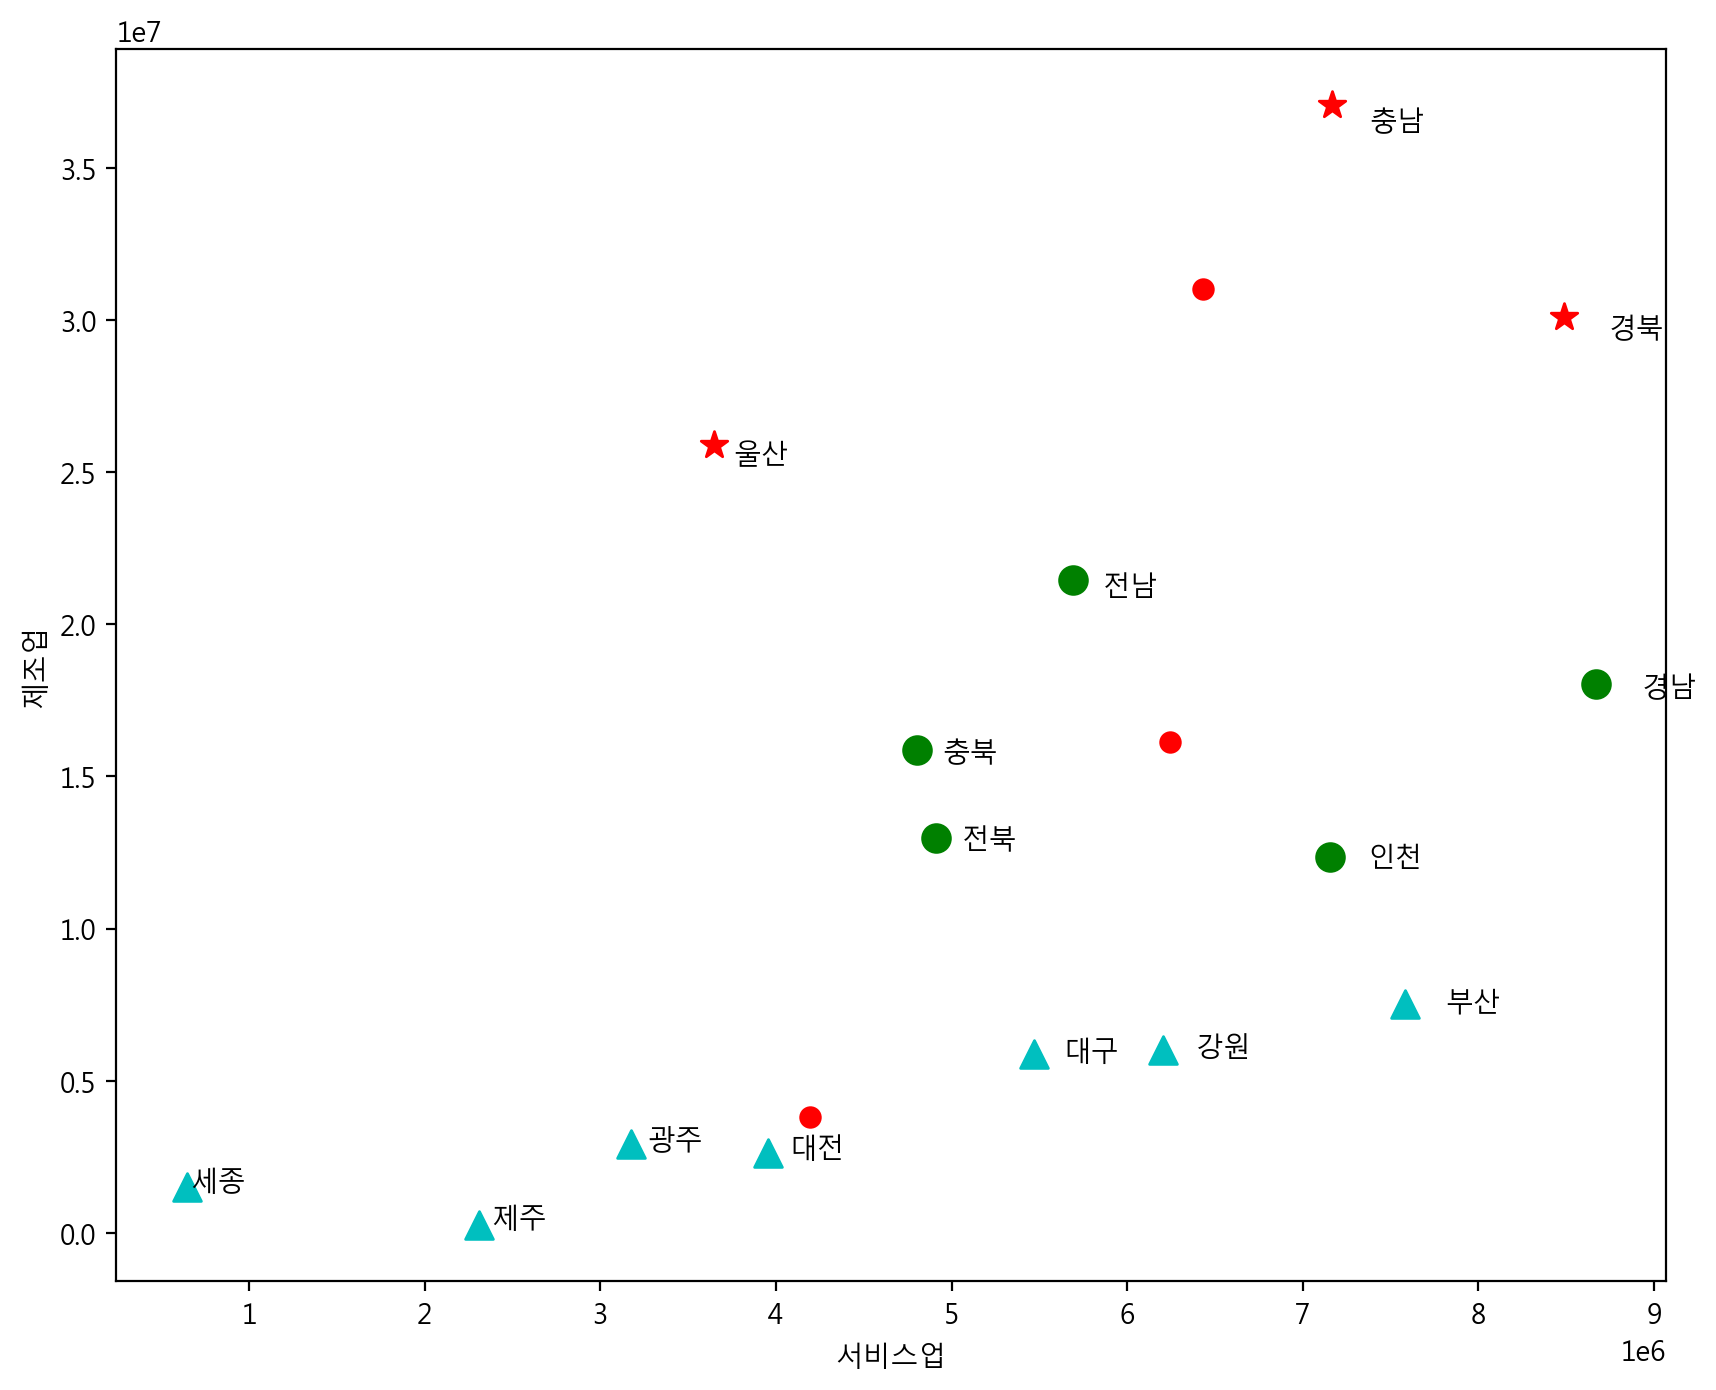

In [19]:
my_markers=['*','^', 'o','^','.',',','1','2']
my_color =['r','c','g','b','g','k','r','y']

plt.figure(figsize=(10, 8))
plt.xlabel('서비스업')
plt.ylabel('제조업')
for n in range(power.shape[0]):
    label = k.labels_[n]
    plt.scatter(power['서비스업'][n], power['제조업'][n], c=my_color[label], marker=my_markers[label], s=100)
    plt.text(power['서비스업'][n]*1.03, power['제조업'][n]*0.98, power.index[n])
    
for i in range(k.n_clusters):
    plt.scatter(centers[i][0], centers[i][1], c = 'r', s= 50)

스케일링 (표준 정규화)
--

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
power[['서비스업', '제조업']] = scaler.fit_transform(power[['서비스업', '제조업']])
power

,서비스업,제조업
구분,,
강원,0.393992,-0.676282
경남,1.498349,0.431200
경북,1.417523,1.539632
광주,-0.963503,-0.960380
대구,0.065323,-0.689116
대전,-0.613482,-0.988171
부산,1.011798,-0.537491
세종,-2.097244,-1.089755
울산,-0.750871,1.150686


정규화 이후의 클러스터링
--

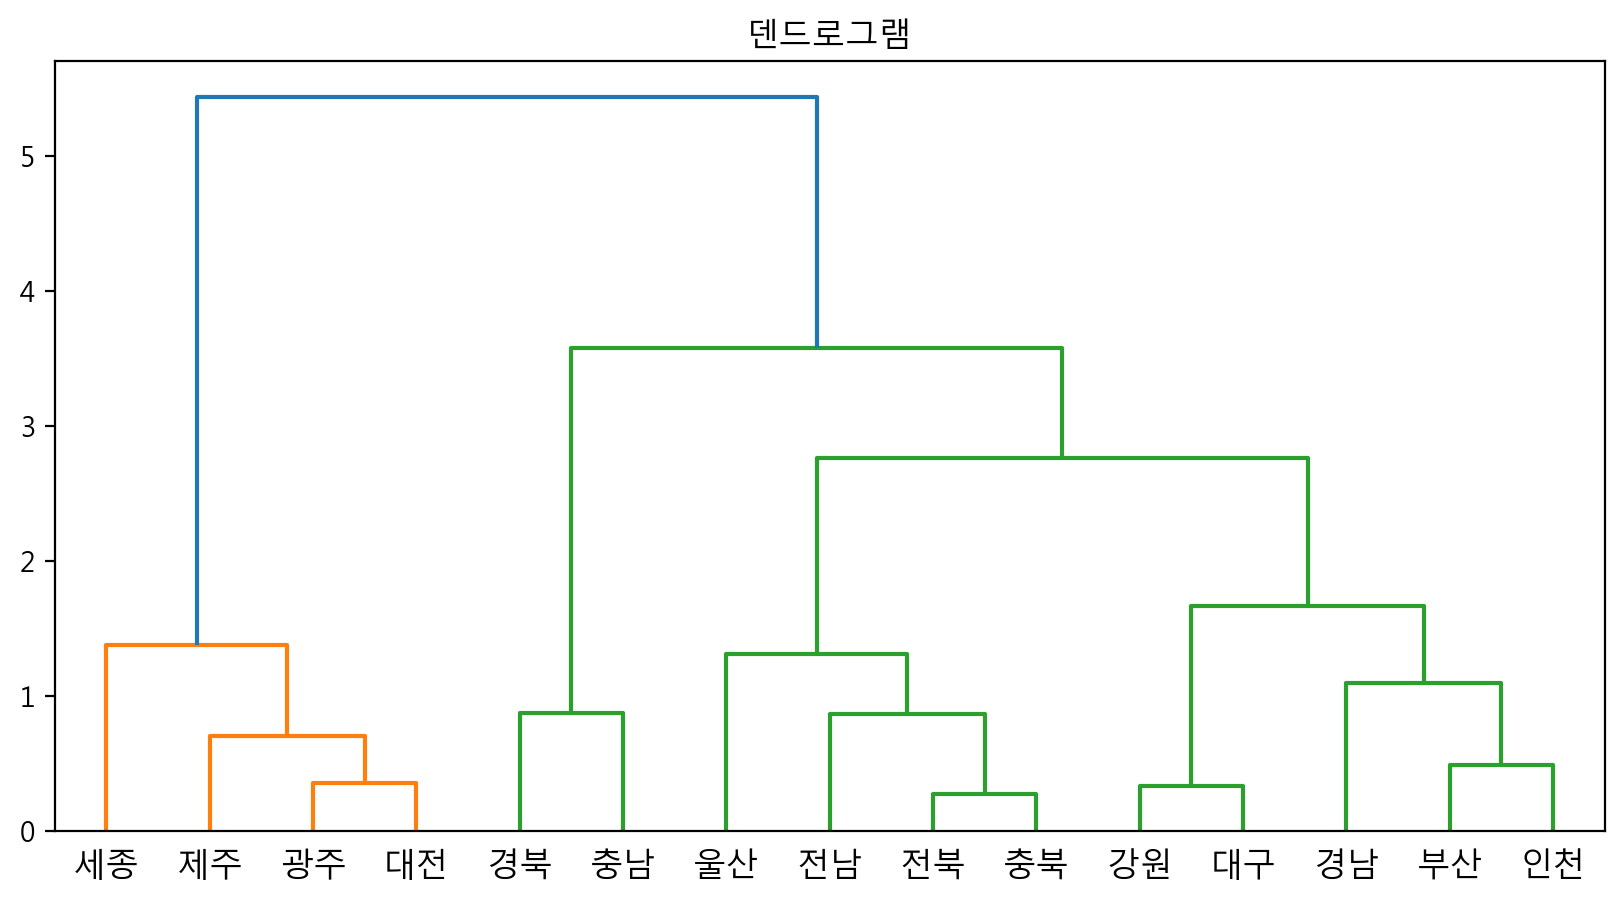

In [21]:
Z = linkage(power, metric='euclidean', method='ward') 
# 유클리드 거리를 이용해 Linkage Matrix를 생성
plt.figure(figsize=(10, 5))
plt.title('덴드로그램')
dendrogram(Z, labels=power.index)
plt.show()

In [22]:
k = KMeans(n_clusters= 4).fit(power)

c:\Users\ysbri\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [23]:
centers = k.cluster_centers_

<Figure size 640x480 with 0 Axes>

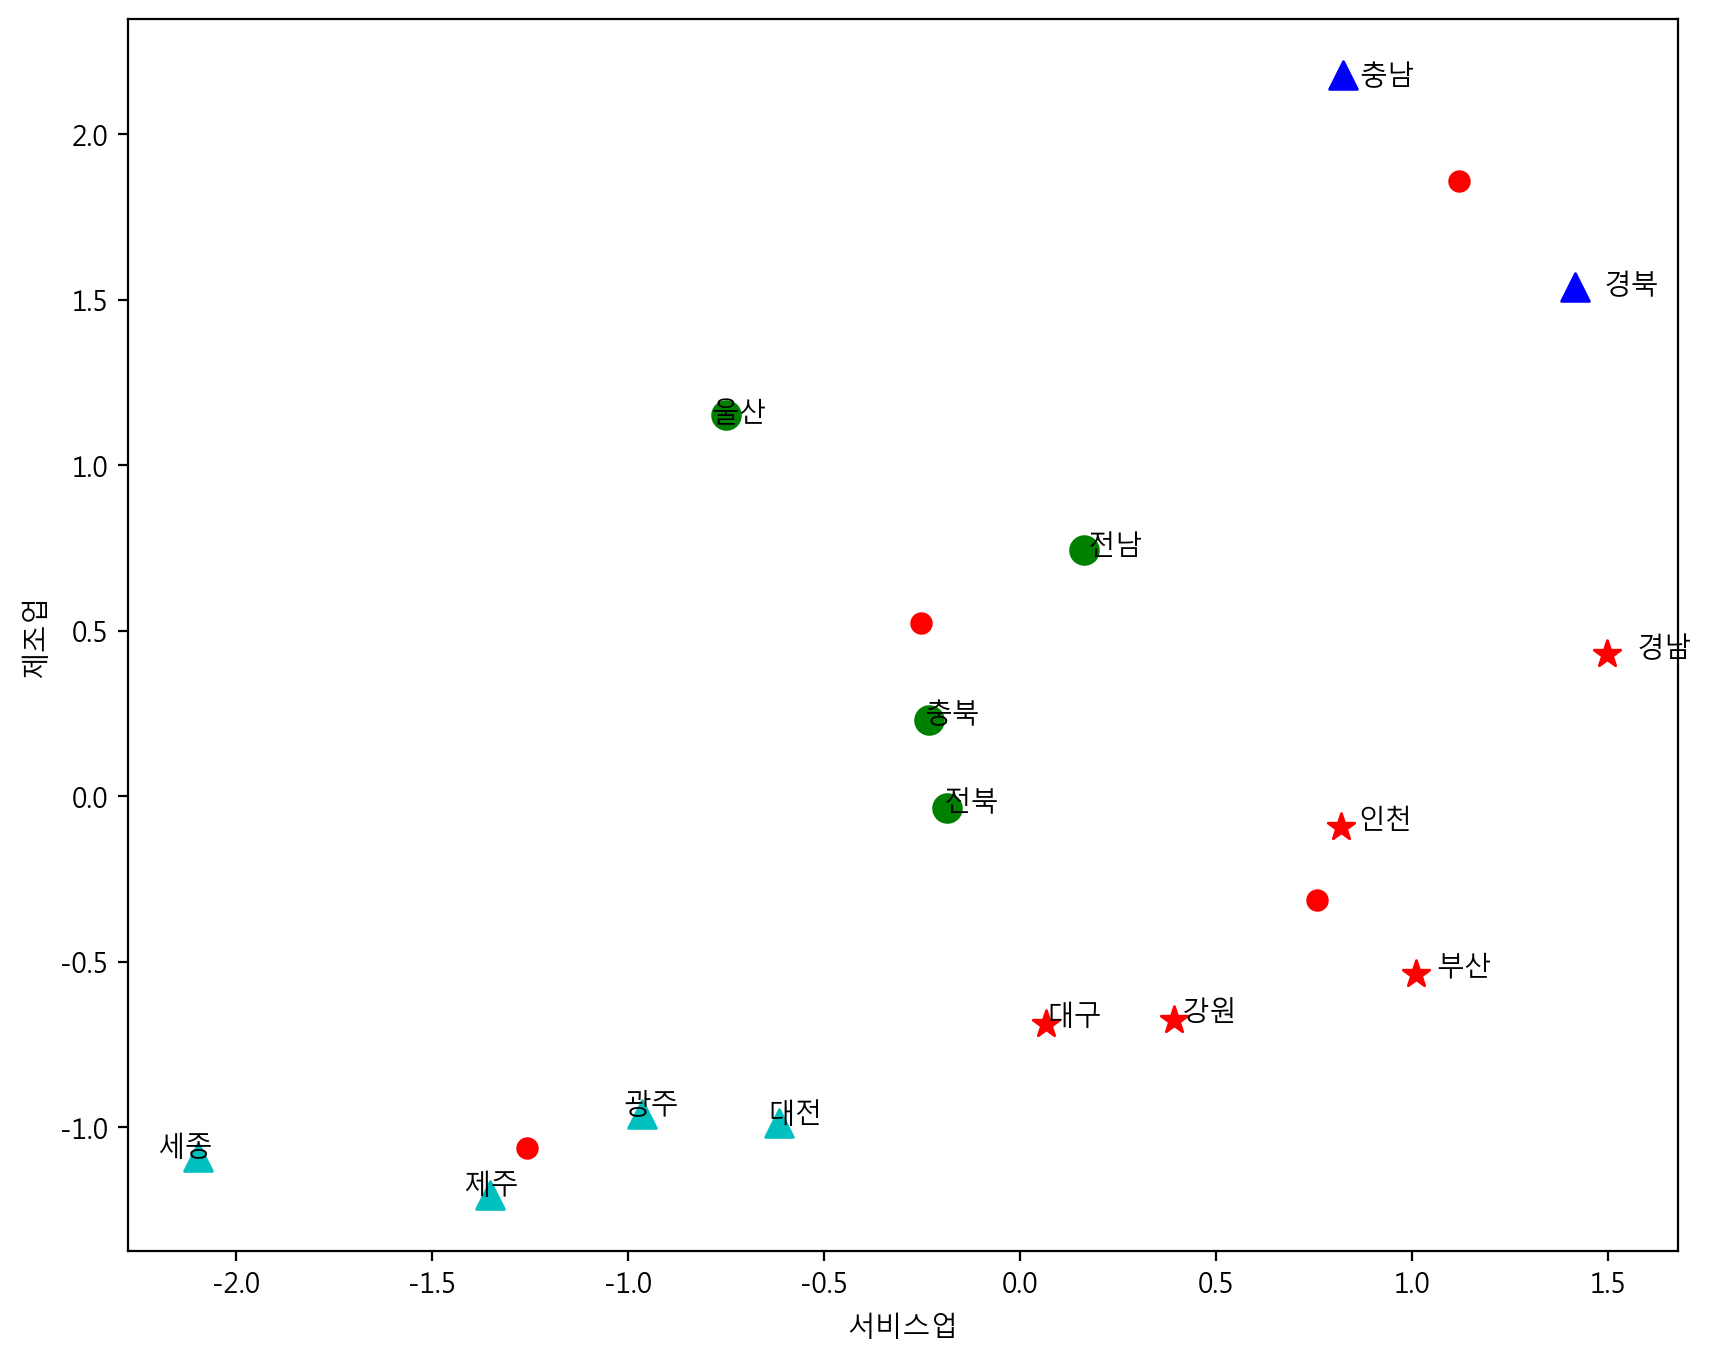

In [24]:
plt.clf()
plt.figure(figsize=(10, 8))
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(power.shape[0]):
    label = k.labels_[n]
    plt.scatter(power['서비스업'][n], power['제조업'][n], c=my_color[label], marker=my_markers[label], s=100)
    plt.text(power['서비스업'][n]*1.05, power['제조업'][n]*0.99, power.index[n])
    
for i in range(k.n_clusters):
    plt.scatter(centers[i][0], centers[i][1], c = 'r', s= 50)

모든 특성을 고려한 크러스터링 (두개가 아니라)
--

In [25]:
power_data.head().T

,0,1,2,3,4
구분,강원,개성,경기,경남,경북
주거용,1940933,0,16587710,4260988,3302463
공공용,1400421,0,5533662,1427560,1578115
서비스업,6203749,0,33434551,8667737,8487402
업무용합계,7604170,0,38968213,10095297,10065517
농림어업,607139,0,2371347,2141813,1747462
광업,398287,0,317263,95989,224568
제조업,6002286,0,56603327,18053778,30115601
식료품제조,546621,0,2544420,932743,566071
"섬유,의류",13027,0,2109963,346974,3780171


In [26]:
power2 = power_data.set_index('구분')
power2.drop(['업무용합계', '산업용합계', '합계'], axis=1, 
           inplace=True, errors='ignore')
power2.drop(['합계','개성','경기','서울'], inplace=True,errors='ignore')

In [27]:
power2.head()

,주거용,공공용,서비스업,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무","펄프,종이",...,1차금속,조립금속,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료
구분,,,,,,,,,,,,,,,,,,,,,
강원,1940933,1400421,6203749,607139,398287,6002286,546621,13027,19147,24382,...,1038913,39477,35063,2019,38062,43986,113448,108629,12872,3418
경남,4260988,1427560,8667737,2141813,95989,18053778,932743,346974,60160,817685,...,3809547,1699879,1902913,8070,924235,534196,2156059,2048646,262523,47662
경북,3302463,1578115,8487402,1747462,224568,30115601,566071,3780171,72680,361772,...,10874970,933178,782570,14468,750786,4174971,2356890,123935,60280,77104
광주,1954876,565527,3174973,74608,2898,2910768,161072,295922,6782,41827,...,75702,156396,198847,5967,236622,723764,512148,5140,13392,16049
대구,3151904,826396,5470438,69142,5858,5862633,212626,1057342,16215,445646,...,317580,661307,516493,58446,180189,252662,1381273,68127,41814,33616


In [28]:
index_power = power2.index
column_power = power2.columns
manufacture = list(column_power).index('제조업')
service = list(column_power).index('서비스업')

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# 이제 power3는 ndarray이다
power3 = scaler.fit_transform(power2)

In [30]:
type(power3);type(power2)

pandas.core.frame.DataFrame

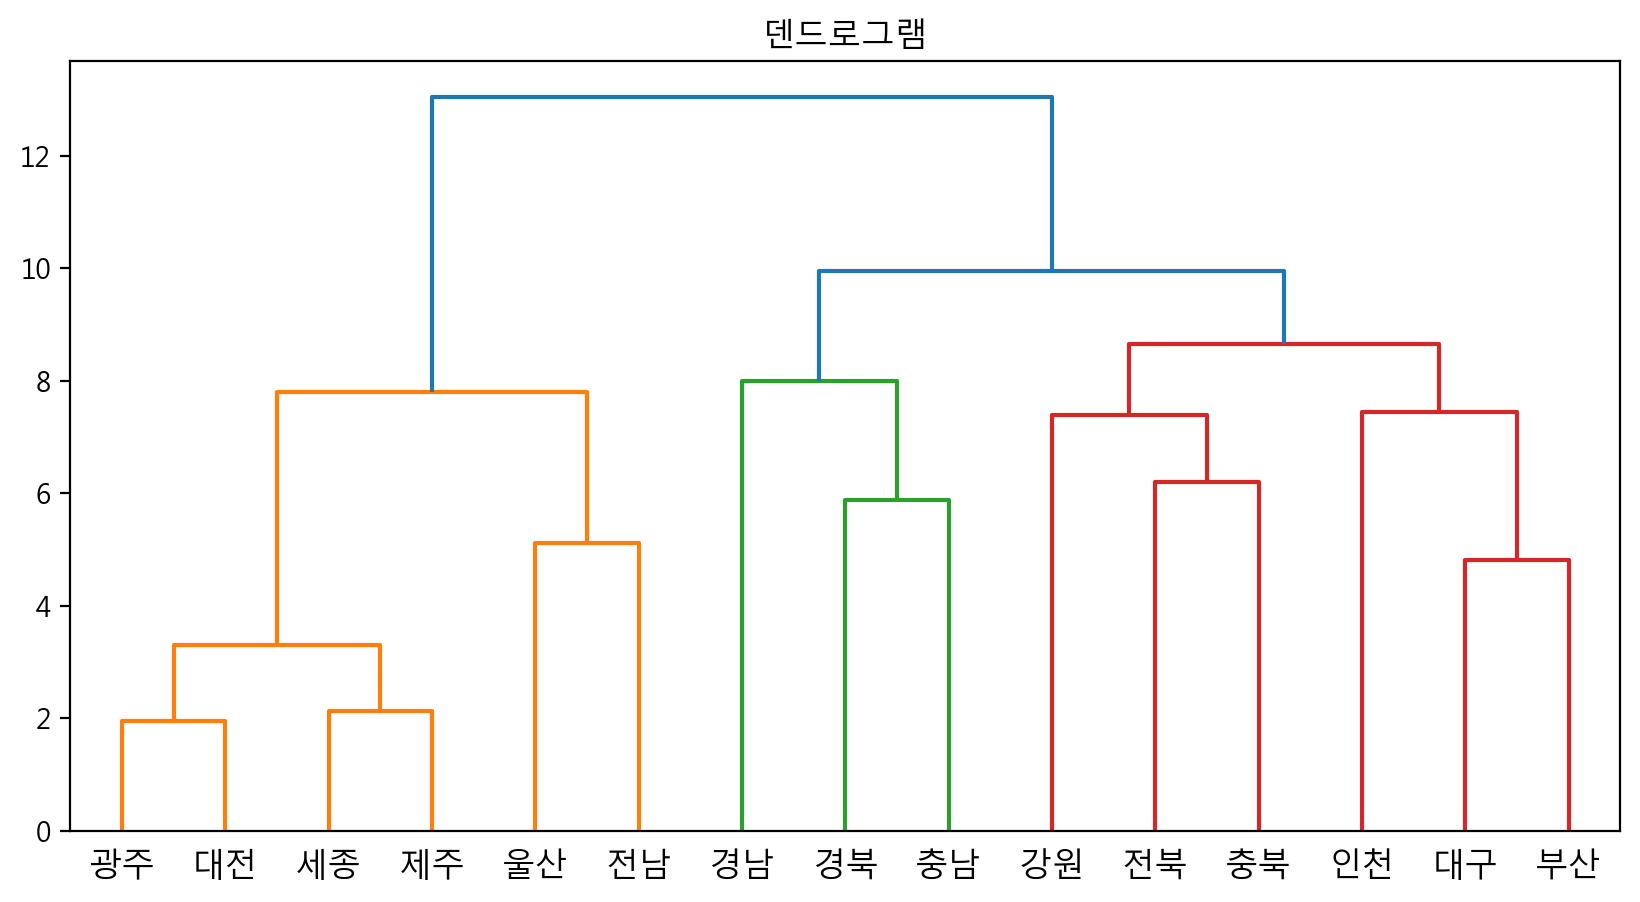

In [31]:
Z = linkage(power3, metric='euclidean', method='ward') 
# 유클리드 거리를 이용해 Linkage Matrix를 생성
plt.figure(figsize=(10, 5))
plt.title('덴드로그램')
dendrogram(Z, labels=index_power)
plt.show()

In [32]:
k = KMeans(n_clusters=8).fit(power3)

c:\Users\ysbri\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


15


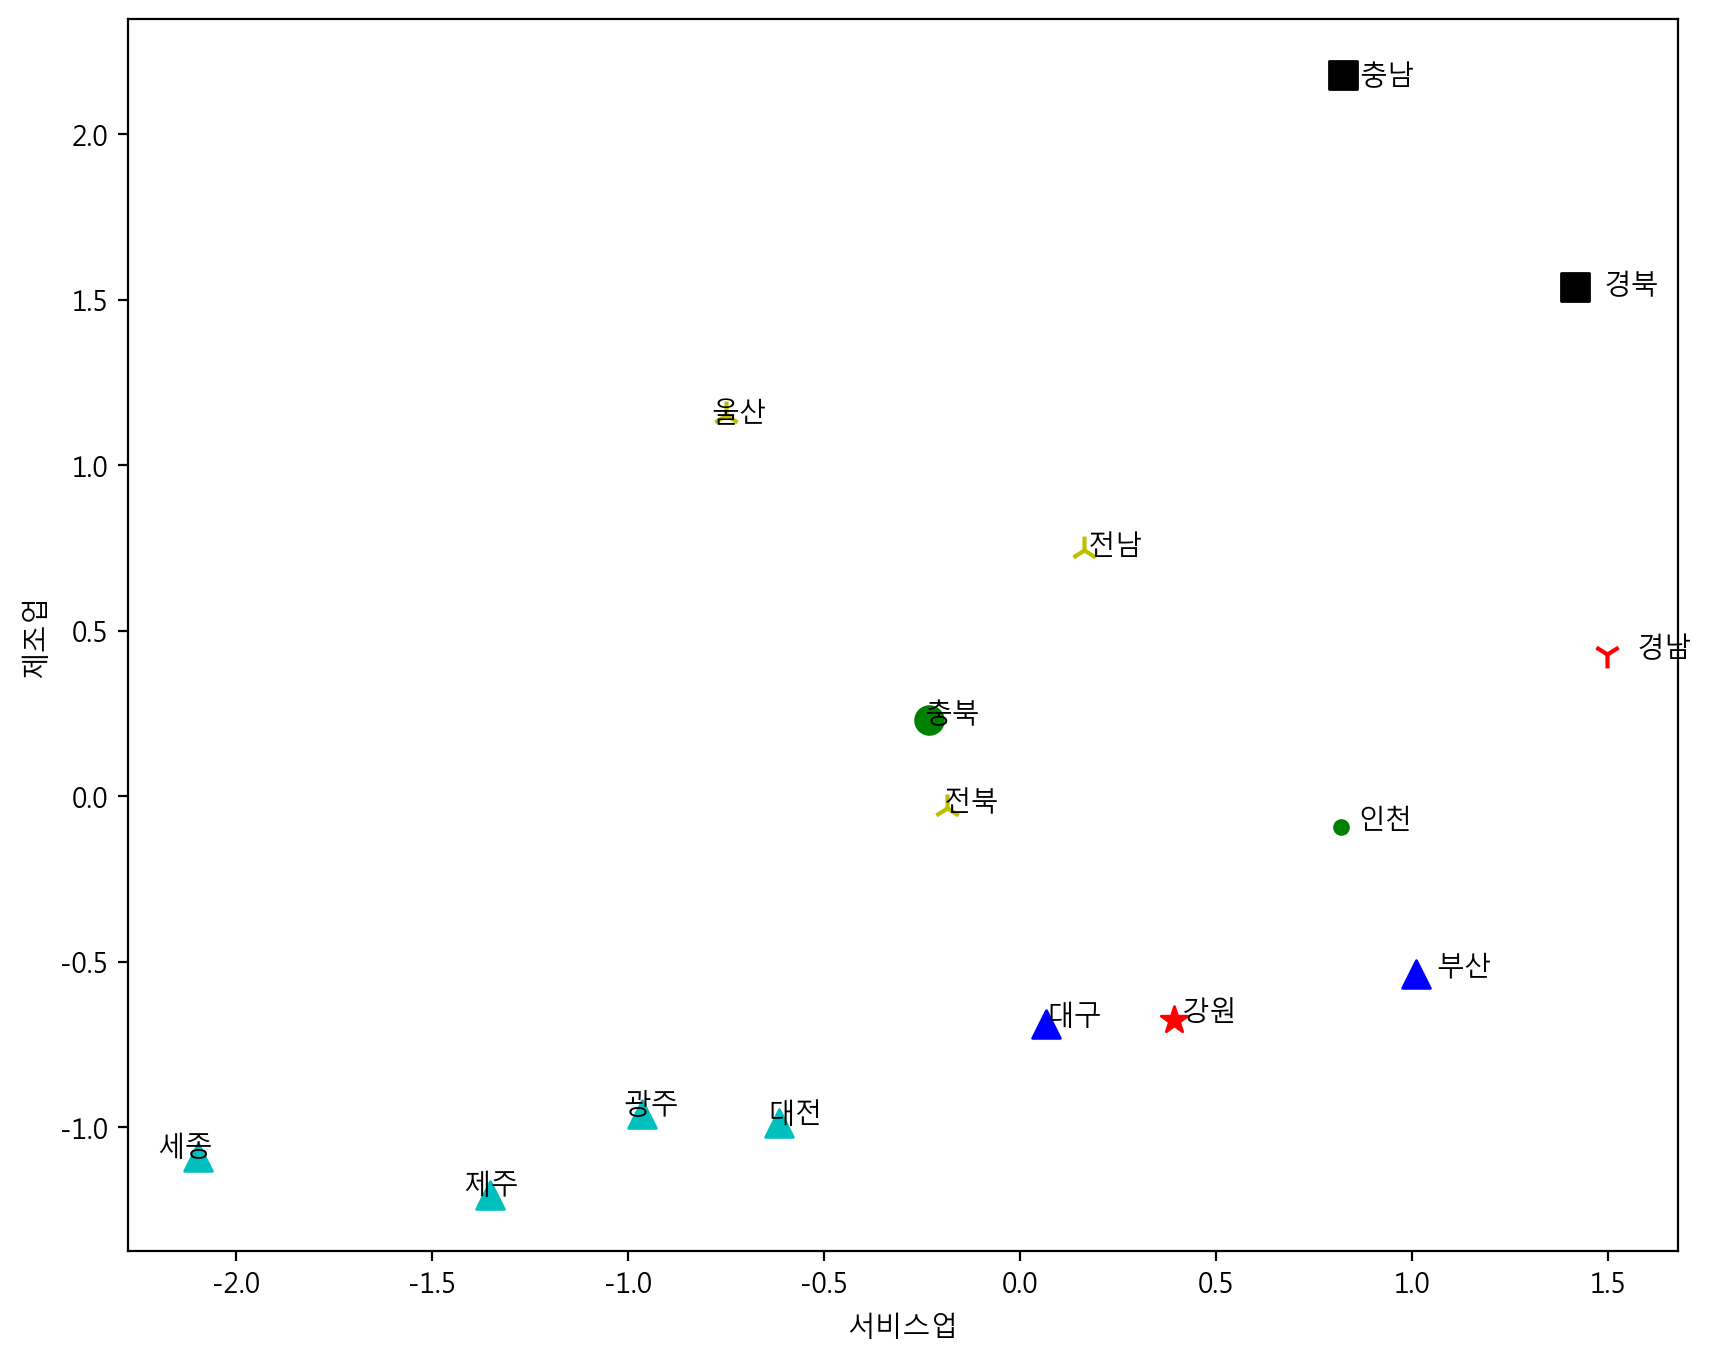

In [33]:
n_samples = power3.shape[0]
print(n_samples)

plt.figure(figsize=(10, 8))
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(n_samples):
    label = k.labels_[n]
    plt.scatter(power3[n][service], power3[n][manufacture], c=my_color[label], marker=my_markers[label], s=100)
    plt.text(power3[n][service]*1.05, power3[n][manufacture]*0.99, index_power[n])

## DBSCAN

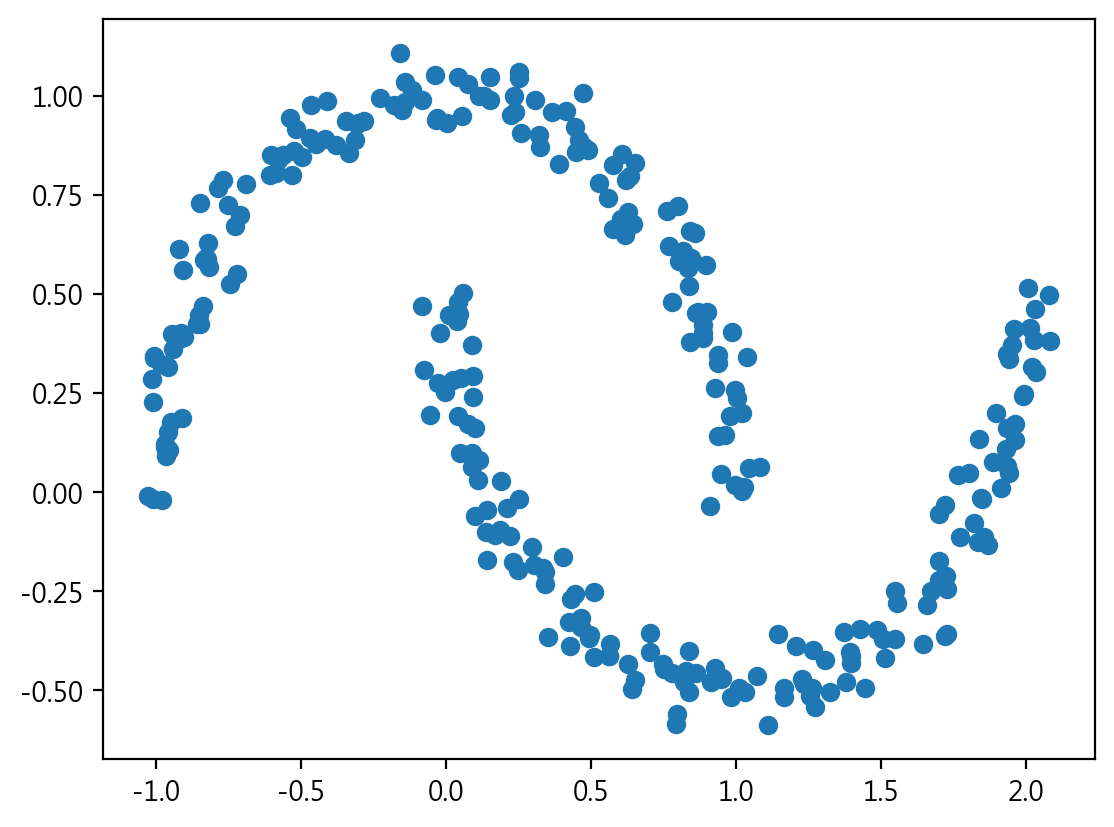

In [34]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
X, y = make_moons(n_samples=300, noise=0.05, random_state=11)
plt.scatter(X[:,0], X[:,1])
plt.show()

c:\Users\ysbri\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


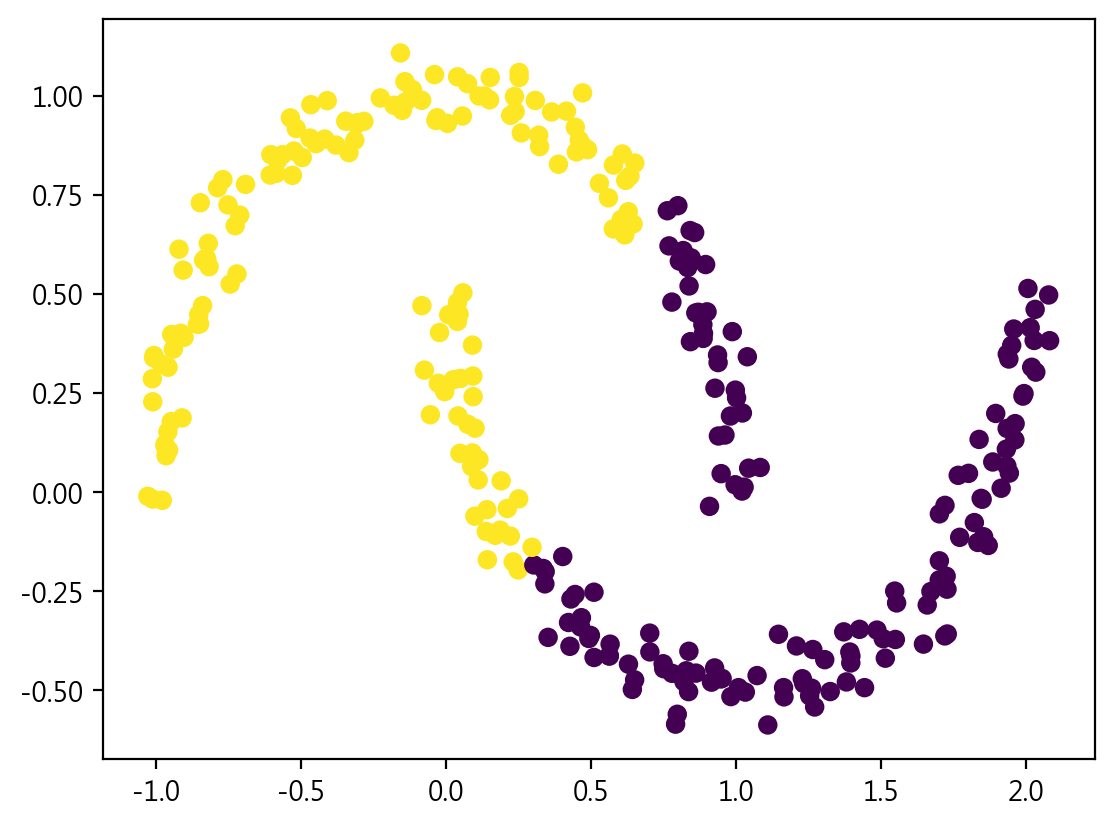

In [35]:
kmeans = KMeans(n_clusters=2)
predict = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)

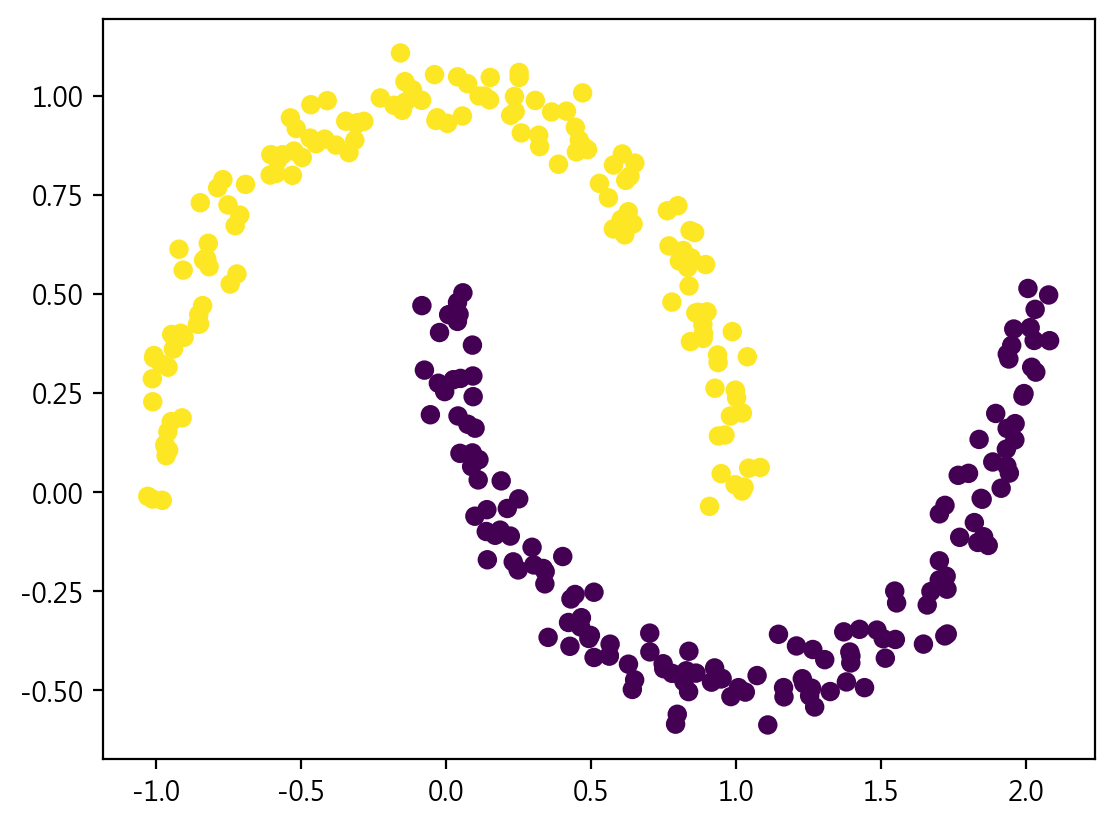

In [36]:
dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)

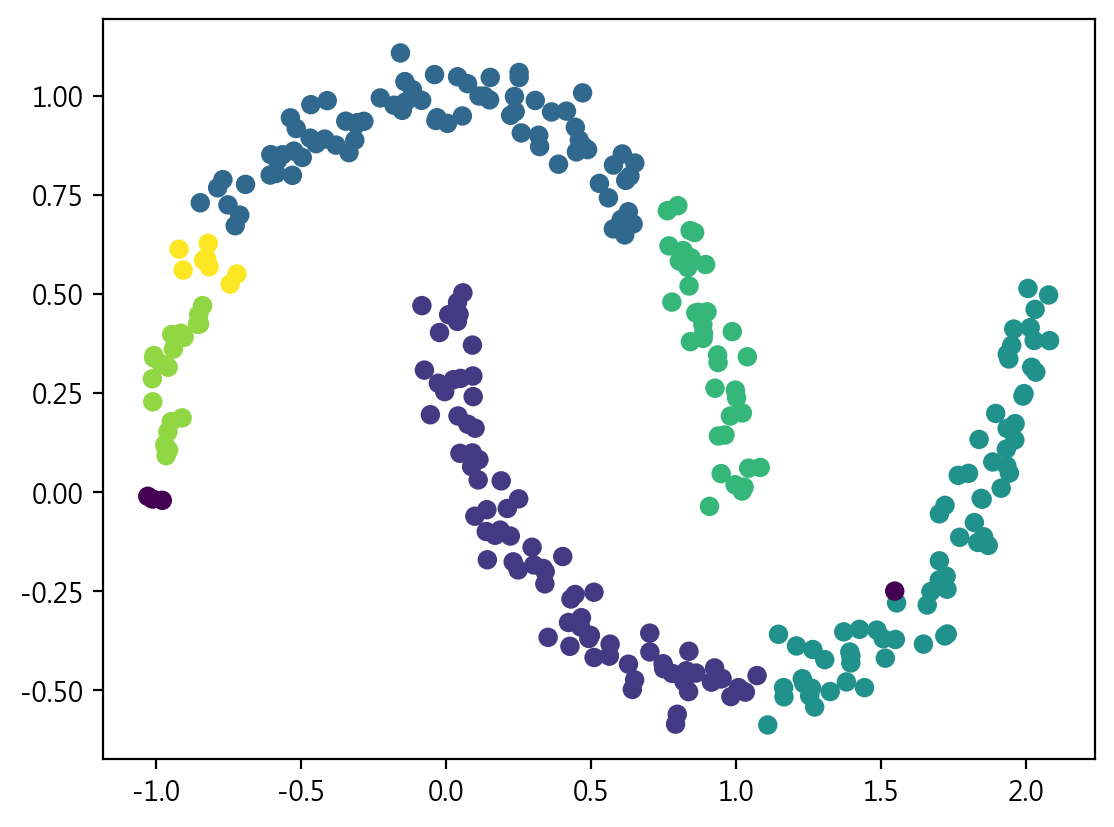

In [37]:
dbscan = DBSCAN(eps=0.1, min_samples=5, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)

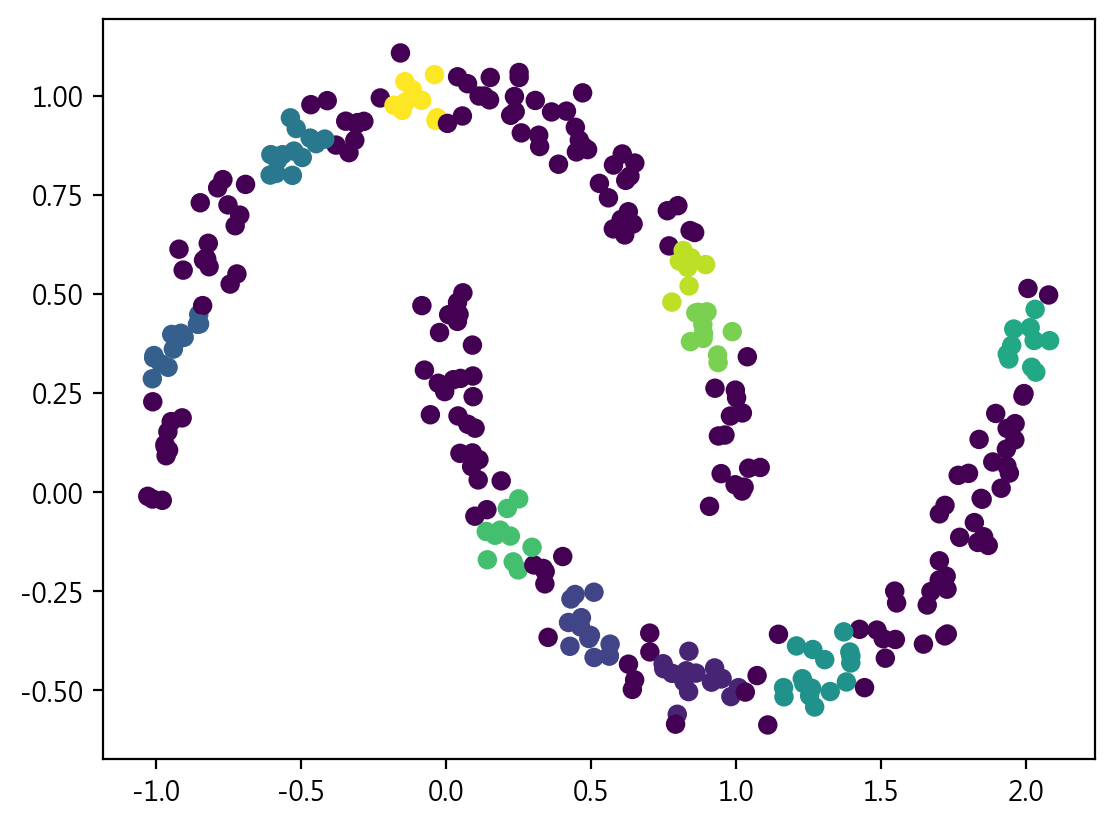

In [38]:
dbscan = DBSCAN(eps=0.1, min_samples=10, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)

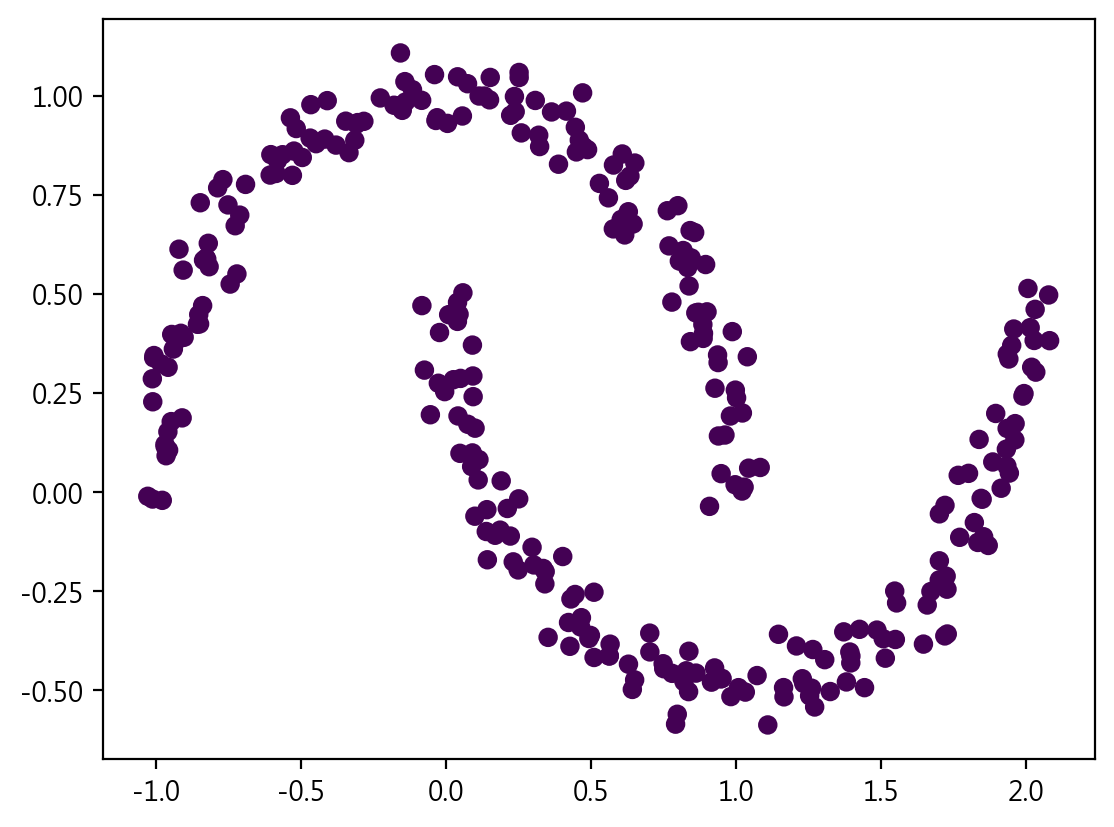

In [39]:
dbscan = DBSCAN(eps=0.5, min_samples=10, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)

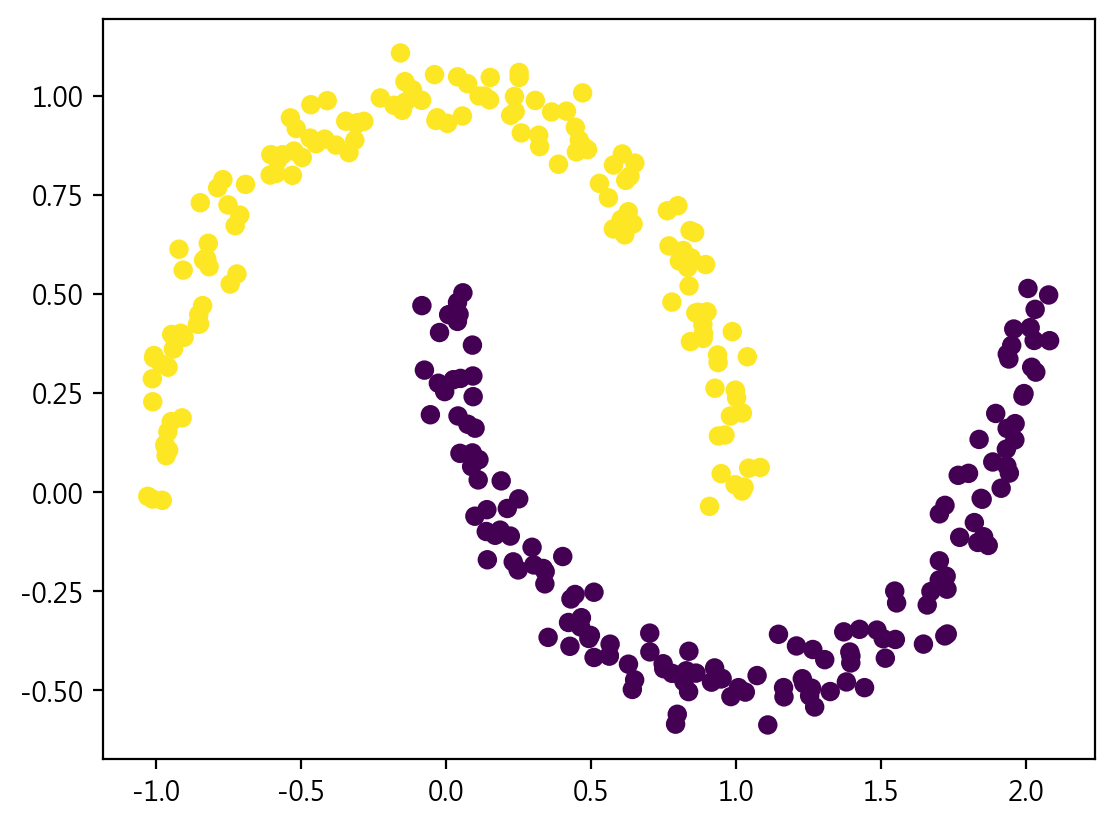

In [40]:
dbscan = DBSCAN(eps=0.2, min_samples=6, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)

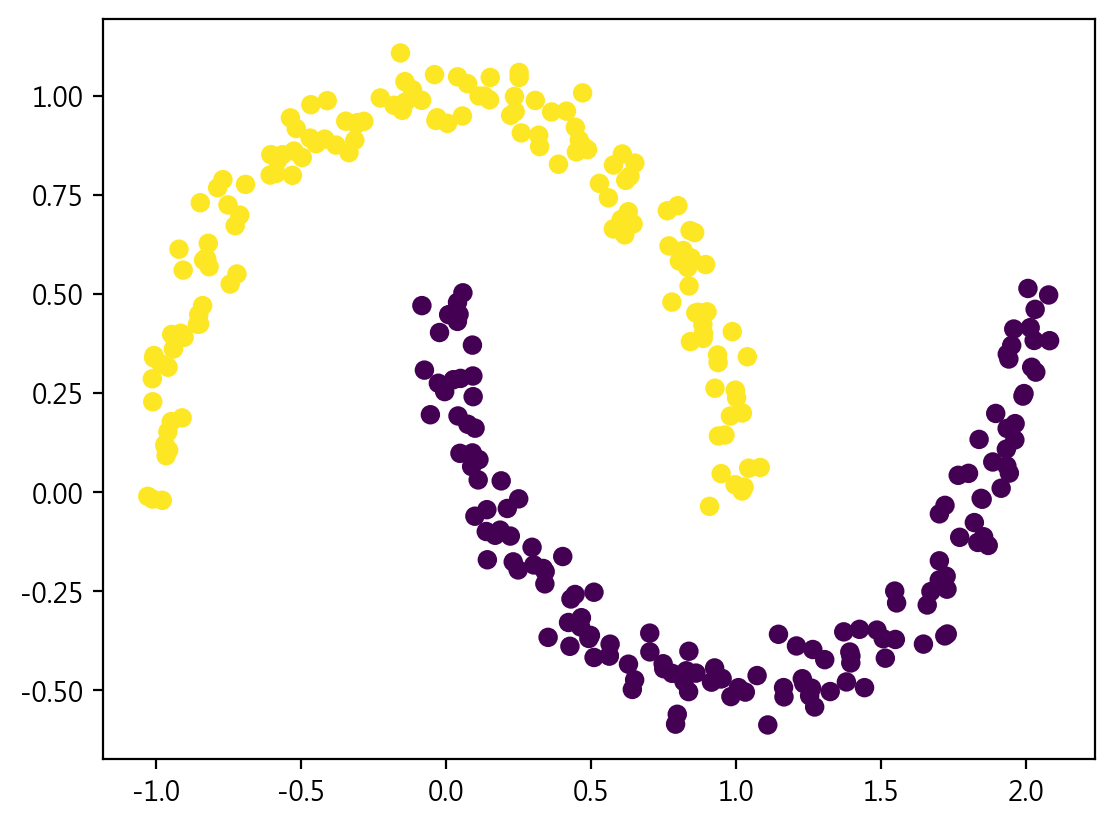

In [41]:
dbscan = DBSCAN(eps=0.2, min_samples=15, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)